# Modelling

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
data=pd.read_csv('https://raw.githubusercontent.com/khairunisa6/Study-Case-Astra-Creditscore/master/training.csv', encoding='Latin1')
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [147]:
data=data.drop(['ID'], axis=1)
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 15 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(8)
memory usage: 1.9 MB


In [149]:
#Convert categorical variable from integer to object
#this part have a purpose to simplify the creation of dummy variables at a next stage
data['MARRIAGE']=data['MARRIAGE'].astype(object)
data['EDUCATION']=data['EDUCATION'].astype(object)
data['SEX']=data['SEX'].astype(object)
data['PAY_1']=data['PAY_1'].astype(object)
data['PAY_2']=data['PAY_2'].astype(object)
data['PAY_3']=data['PAY_3'].astype(object)

In [150]:
#Defined of Target as variable dependent and Other variable as variable independent
#Convert categorical variable to dummy variable

y=data['TARGET']
X=data.drop(['TARGET'],1)

#Convert categorical variable to dummy variable
X=pd.get_dummies(X)
X.shape

(16625, 32)

In [151]:
X.head() #see new variable was created by dummies variable

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,MARRIAGE_1,MARRIAGE_2,...,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4
0,30000.0,40,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,20000.0,41,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,20000.0,36,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,20000.0,35,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,170000.0,38,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,1,0,...,1,0,0,0,0,1,0,0,0,0


# Make Function Modelling

### In this part, i build some model and get accurancy from it and then compared it
### Method of Classifier:
    1. Logistic Regression
    2. Random Forest Classifier
    3. Decision Tree Classifier
    4. KNN Classifier

## 1. Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [153]:
#Model of Logistic Regression classification
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
#Get Accurancy of model logistic regression
y_predLR = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.63


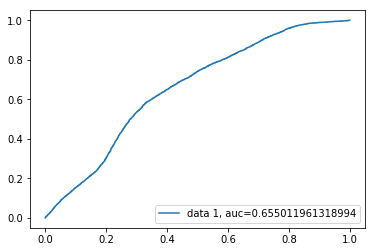

In [155]:
#Get Information of Area Under Curve (AUC)
y_pred_probaLR = logreg.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_probaLR)
auc = metrics.roc_auc_score(y, y_pred_probaLR)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 2. Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [157]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [158]:
y_predRF=clf.predict(X)

In [159]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_predRF))

Accuracy: 0.7392481203007519


## 3. Decision Tree Classifier

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [161]:
X = data.drop(['TARGET'],axis=1) # Features
y = data['TARGET'] # Target variable

In [162]:
# Create Decision Tree classifer object
clfdt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfdt = clfdt.fit(X, y)

#Predict the response for test dataset
y_pred = clfdt.predict(X)

In [163]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.9996390977443609


## 4. KNN Classifier

In [164]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X, y)

#Predict the response for test dataset
y_pred = knn.predict(X)

In [165]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.8692932330827068


### By maintain results of the four models above then I used the decision tree to classify the credit scoring class.

### Save model in .pkl

In [166]:
from sklearn.externals import joblib

In [167]:
joblib.dump(clfdt, r'C:\Users\faizah064287\Documents\Data Scientist Boothcamp\Python/Credit Scoring using Decision Tree.pkl')

['C:\\Users\\faizah064287\\Documents\\Data Scientist Boothcamp\\Python/Credit Scoring using Decision Tree.pkl']

### Data Testing

In [168]:
datatest=pd.read_csv('https://raw.githubusercontent.com/khairunisa6/Study-Case-Astra-Creditscore/master/testing.csv', sep=';', encoding='Latin1')
datatest=datatest.drop(['ID'], axis=1)
datatest.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [169]:
datatest['MARRIAGE']=datatest['MARRIAGE'].astype(object)
datatest['EDUCATION']=datatest['EDUCATION'].astype(object)
datatest['SEX']=datatest['SEX'].astype(object)
datatest['PAY_1']=datatest['PAY_1'].astype(object)
datatest['PAY_2']=datatest['PAY_2'].astype(object)
datatest['PAY_3']=datatest['PAY_3'].astype(object)

In [170]:
decision_tree_model_load = joblib.load(r'C:\Users\faizah064287\Documents\Data Scientist Boothcamp\Python/Credit Scoring using Decision Tree.pkl')

In [171]:
datatest['TARGET'] = decision_tree_model_load.predict(datatest)

In [172]:
datatest.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0
